# July 09 - AE to VE transition

In [1]:
# Imports
import math
import os
import sys
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)
    
# Import the custom plotting module
from plot_utils import plot_utils
import random
import torch

# Label dict - Dictionary mapping integer labels to str
label_dict = {0:"gamma", 1:"e", 2:"mu"}

np.set_printoptions(threshold=np.inf)

In [2]:
def plot_event(dump_dir, iteration, mode):
    
    if mode is "validation":
        np_arr_path = dump_dir + "val_iteration_" + str(iteration) + ".npz"
    else:
        np_arr_path = dump_dir + "iteration_" + str(iteration) + ".npz"
    
    # Load the numpy array
    np_arr = np.load(np_arr_path)
    np_event, np_recon, np_labels, np_energies = np_arr["events"], np_arr["prediction"], np_arr["labels"], np_arr["energies"]

    i = random.randint(0, np_labels.shape[0]-1)
    plot_utils.plot_actual_vs_recon(np_event[i], np_recon[i], 
                                    label_dict[np_labels[i]], np_energies[i].item(),
                                    show_plot=True)

    plot_utils.plot_charge_hist(torch.tensor(np_event).permute(0,2,3,1).numpy(),
                                np_recon, 50000, num_bins=200)

In [3]:
def plot_training(run_id, model_name, iteration, variant):

    dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"

    # Setup the path to the training log file
    training_log = dump_dir + "log_train.csv"

    if variant is "AE":
        plot_utils.plot_ae_training([training_log], [model_name], {model_name:["red"]},
                                 downsample_interval=32, show_plot=True, legend_loc=(0.8,0.8))
    elif variant is "VAE":
        plot_utils.plot_vae_training([training_log], [model_name], {model_name:["red", "blue"]},
                                 downsample_interval=32, show_plot=True, legend_loc=(0.8,0.8))
        
    plot_event(dump_dir, iteration, mode="training")

## Test 1 : Train an autoencoder with a bottleneck and save the weights

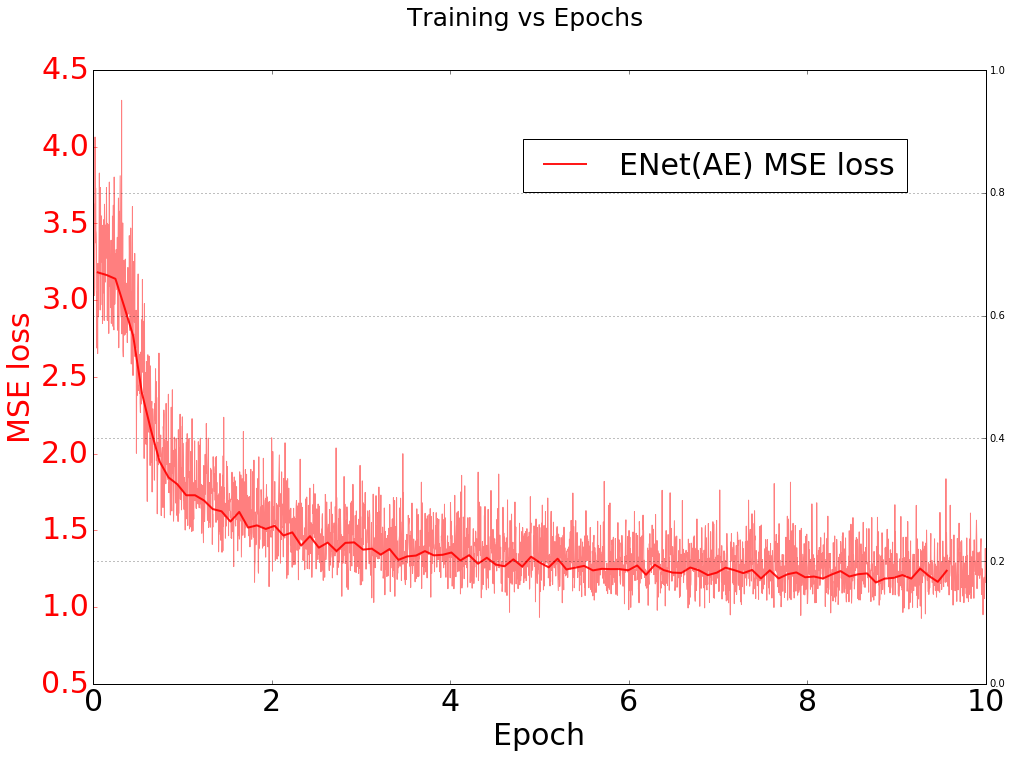

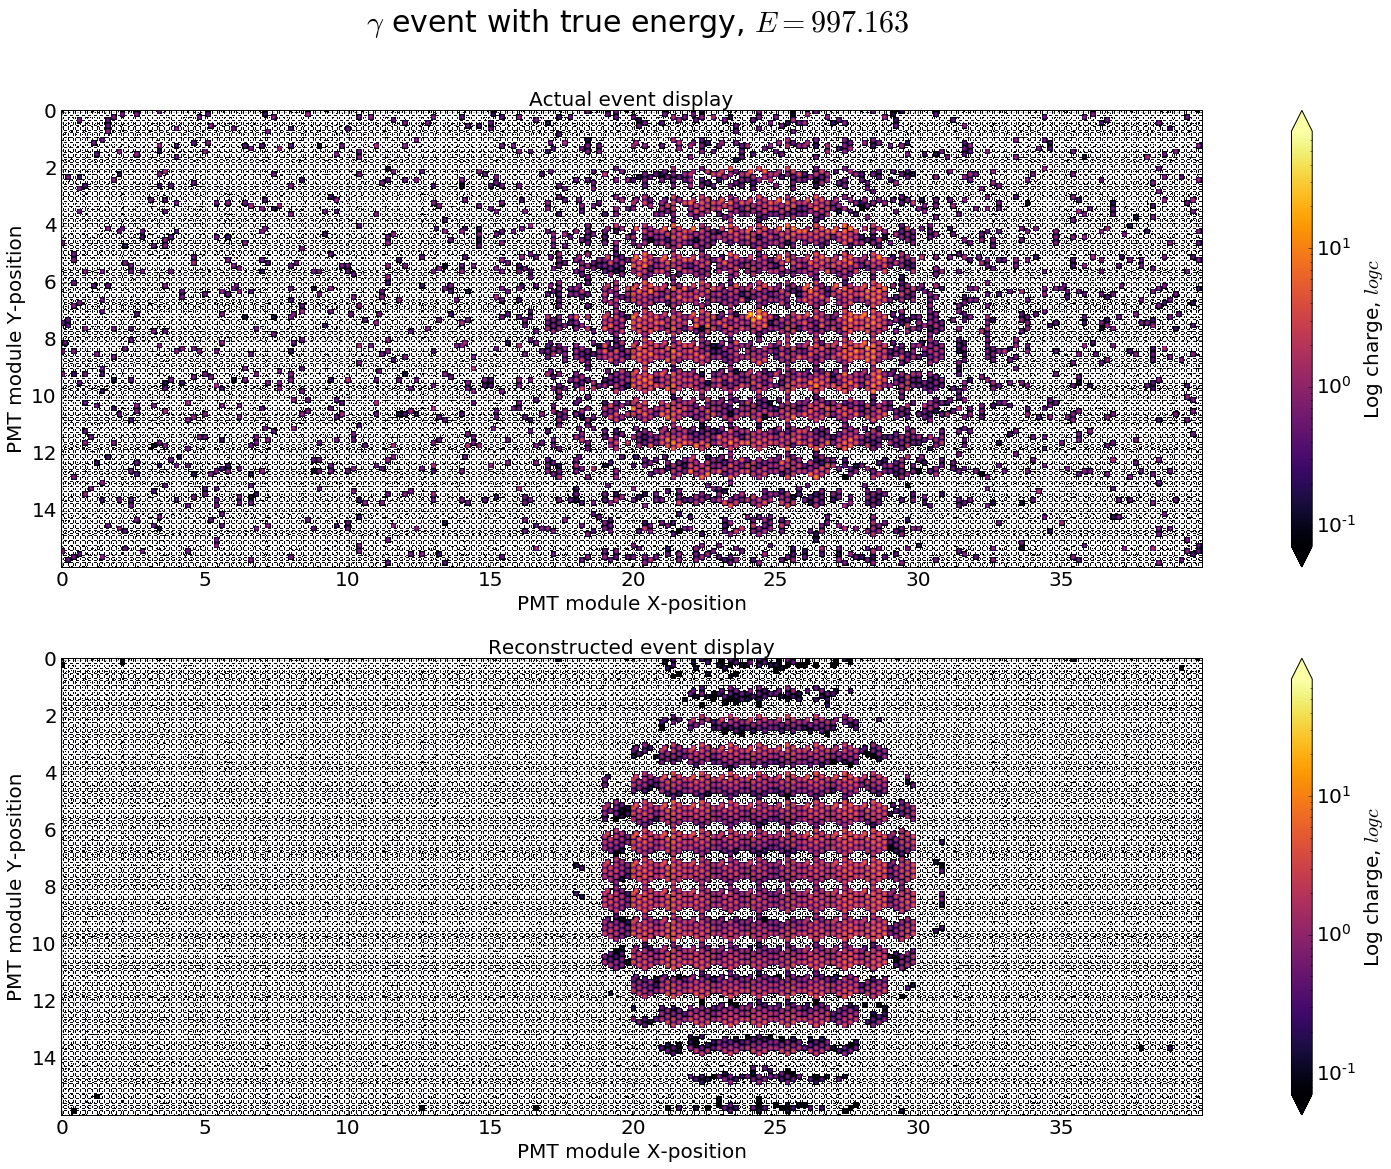

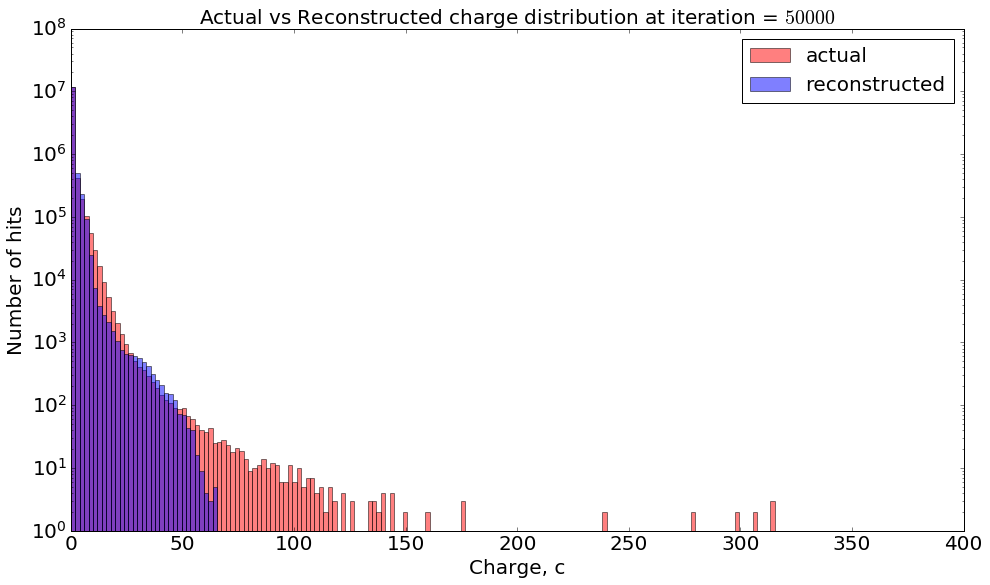

In [4]:
plot_training("20190710_024639", "ENet(AE)", 2999, "AE")

## Test 2 : Train another autoencoder with a bottleneck with the dark noise and save the weights

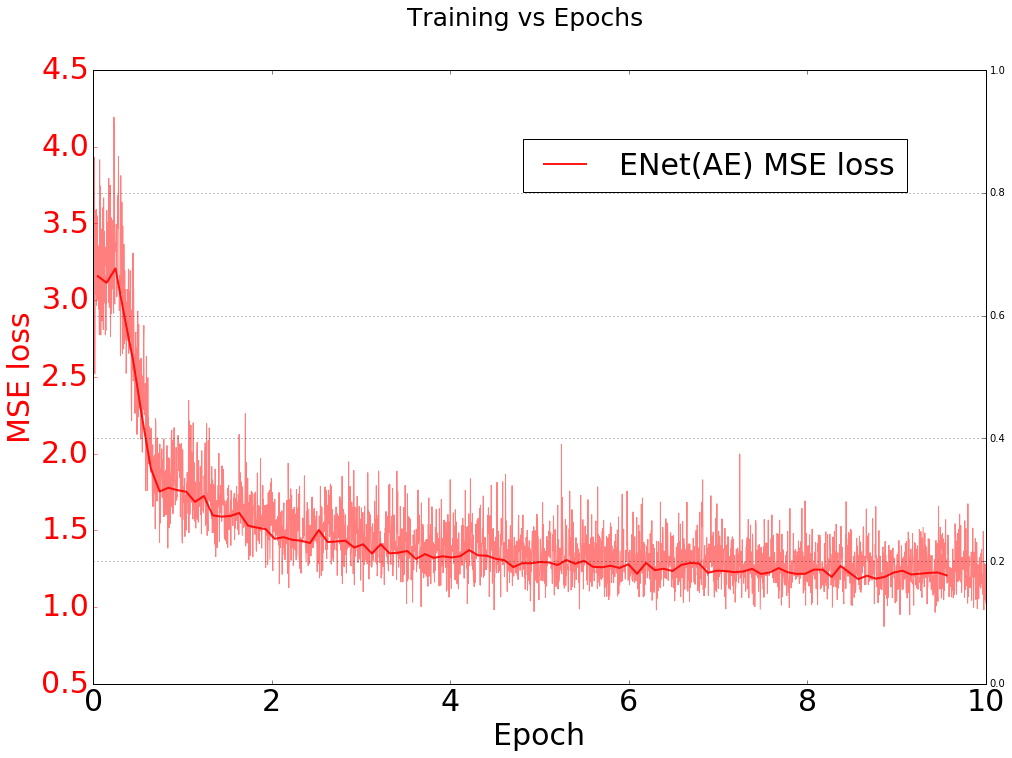

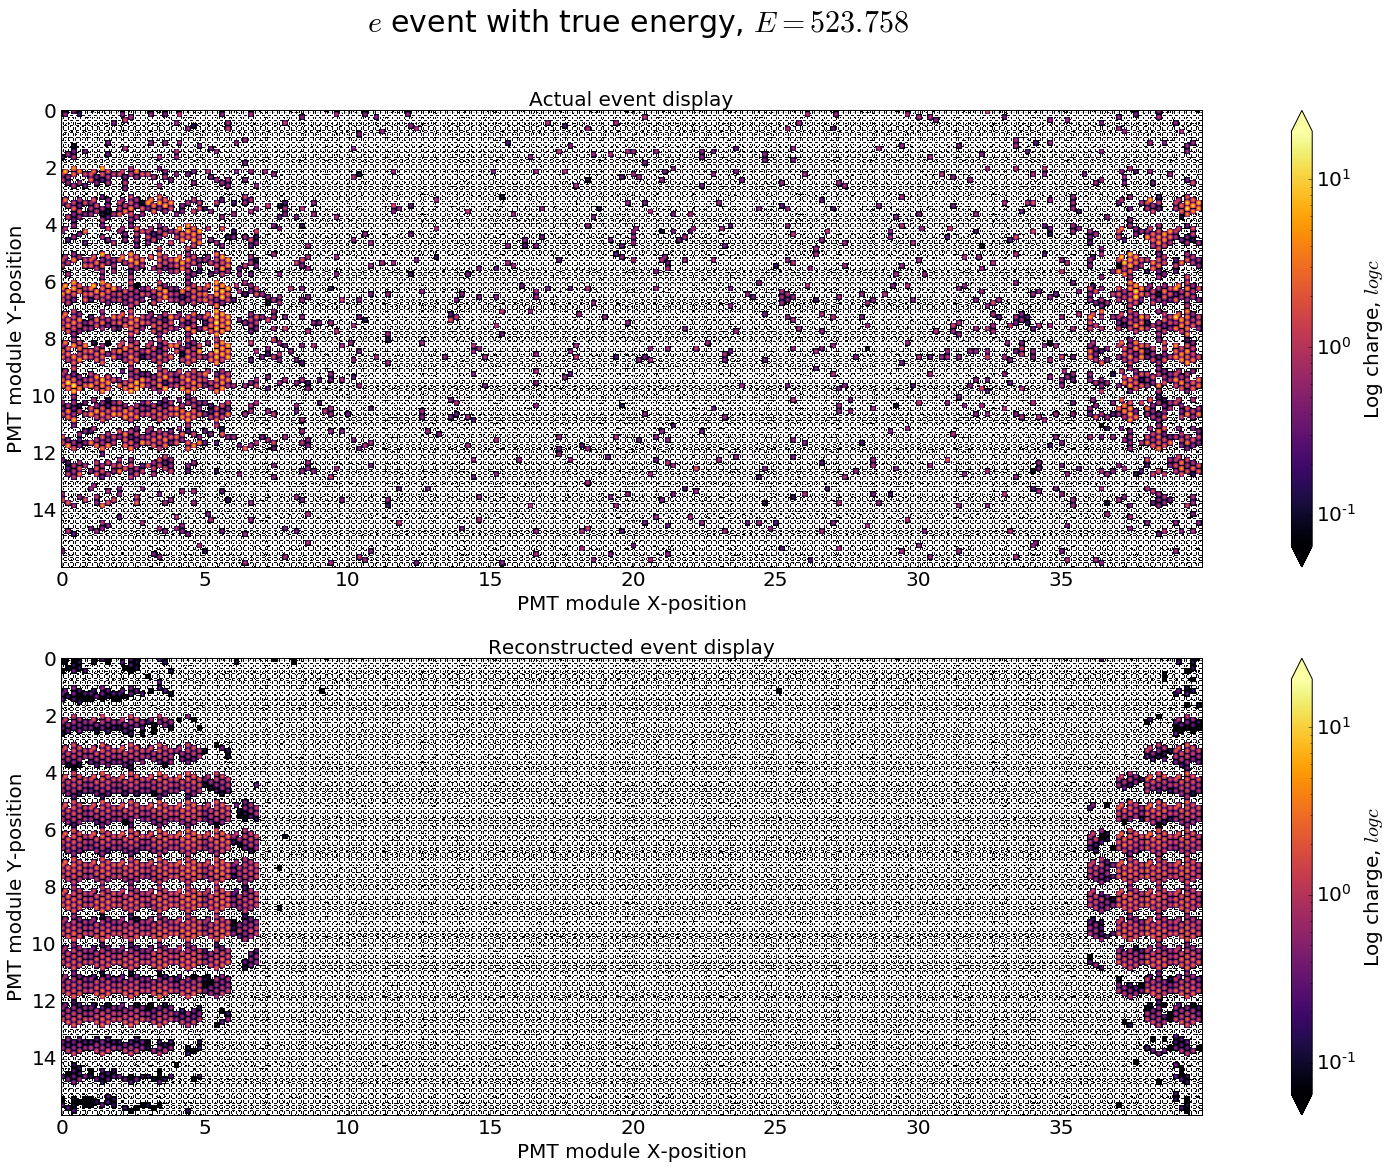

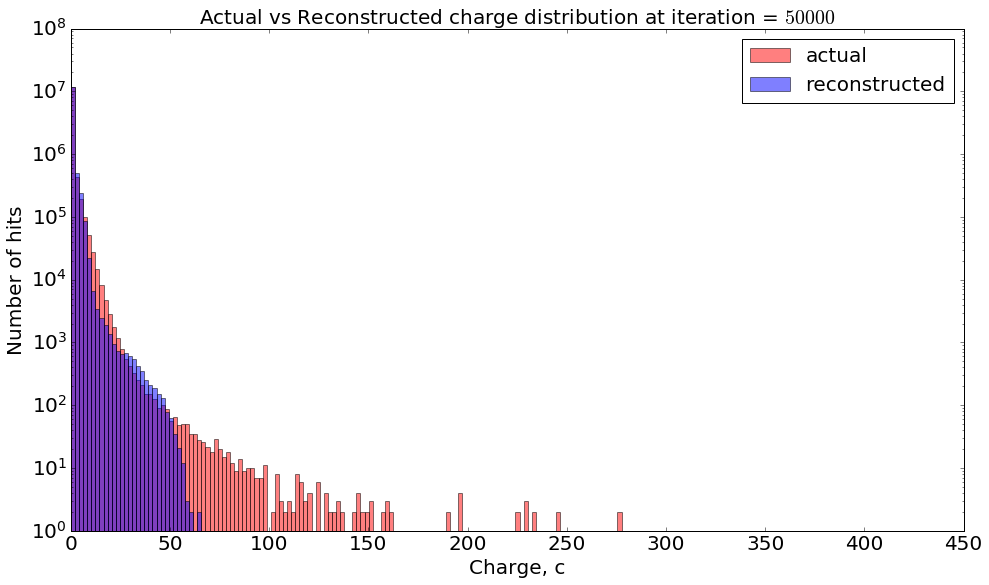

In [9]:
plot_training("20190710_032718", "ENet(AE)", 2999, "AE")

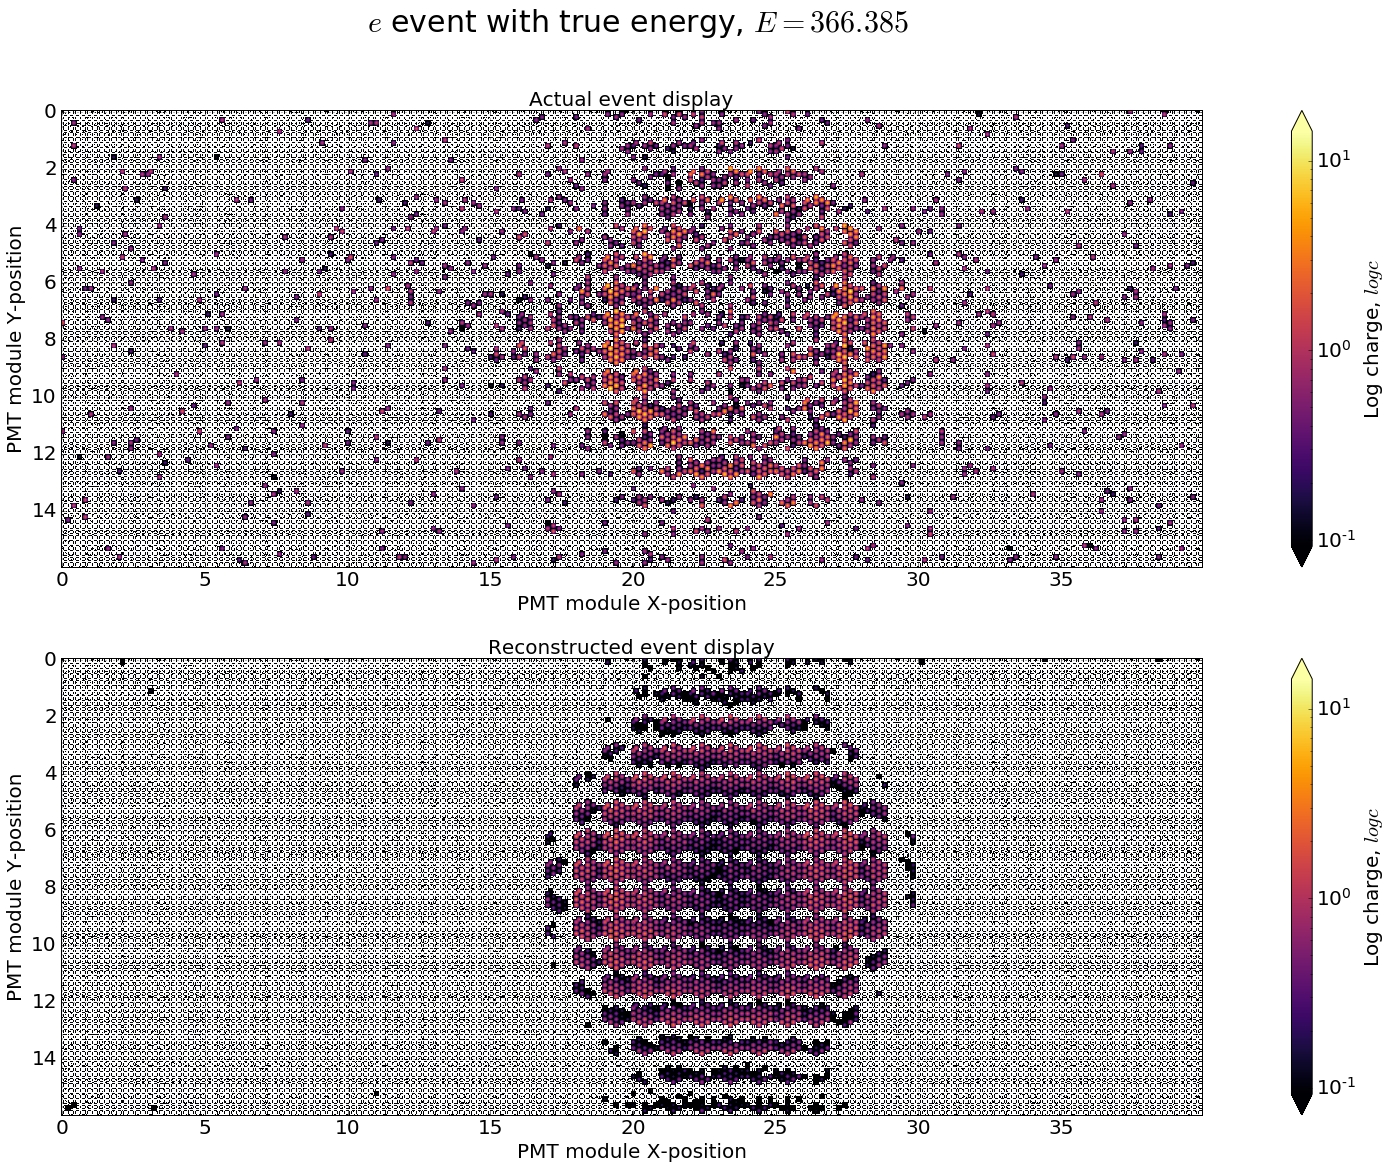

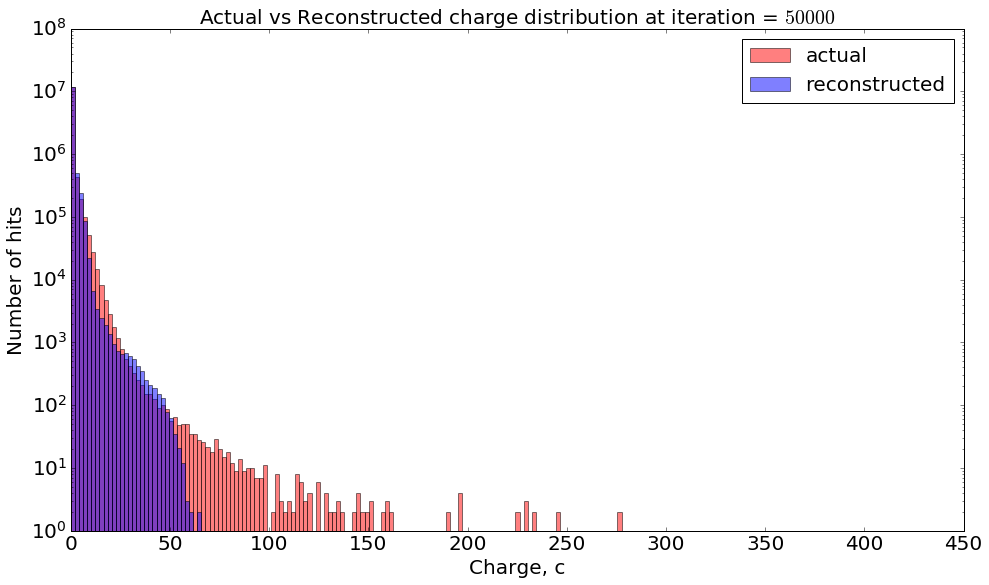

In [18]:
plot_event("/home/akajal/WatChMaL/VAE/dumps/20190710_032718/", 2999, "Training")

## Test 3 : Add the VAE bottleneck to the trained autoencoder from above

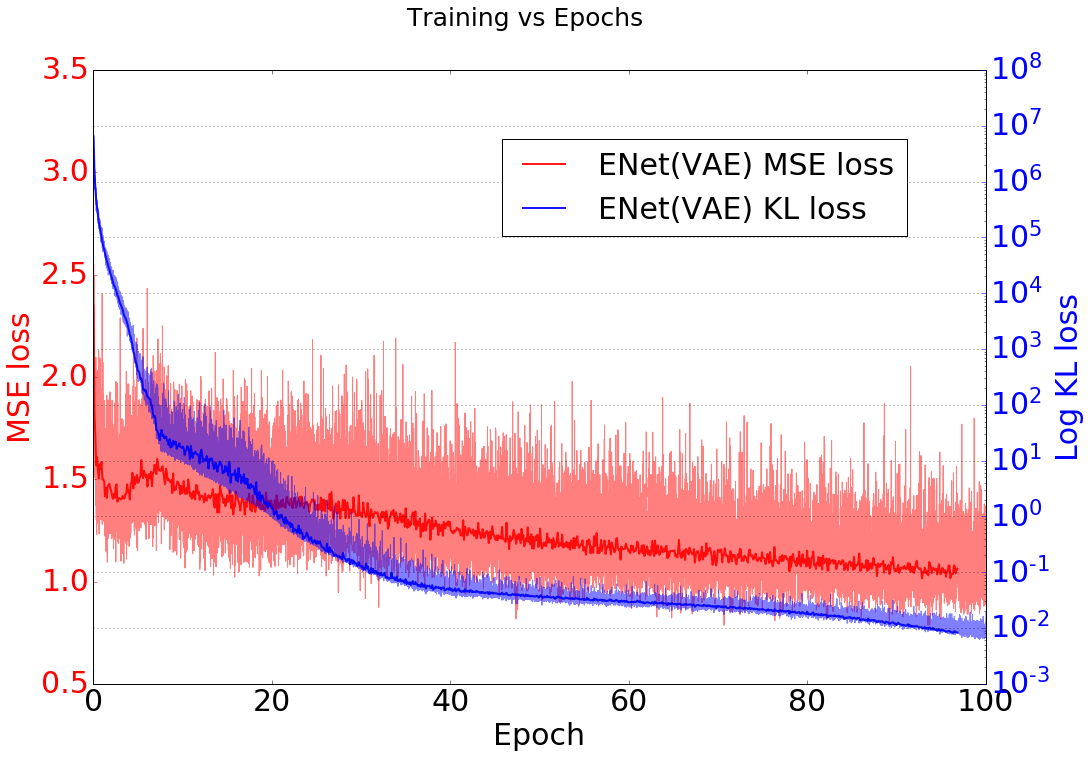

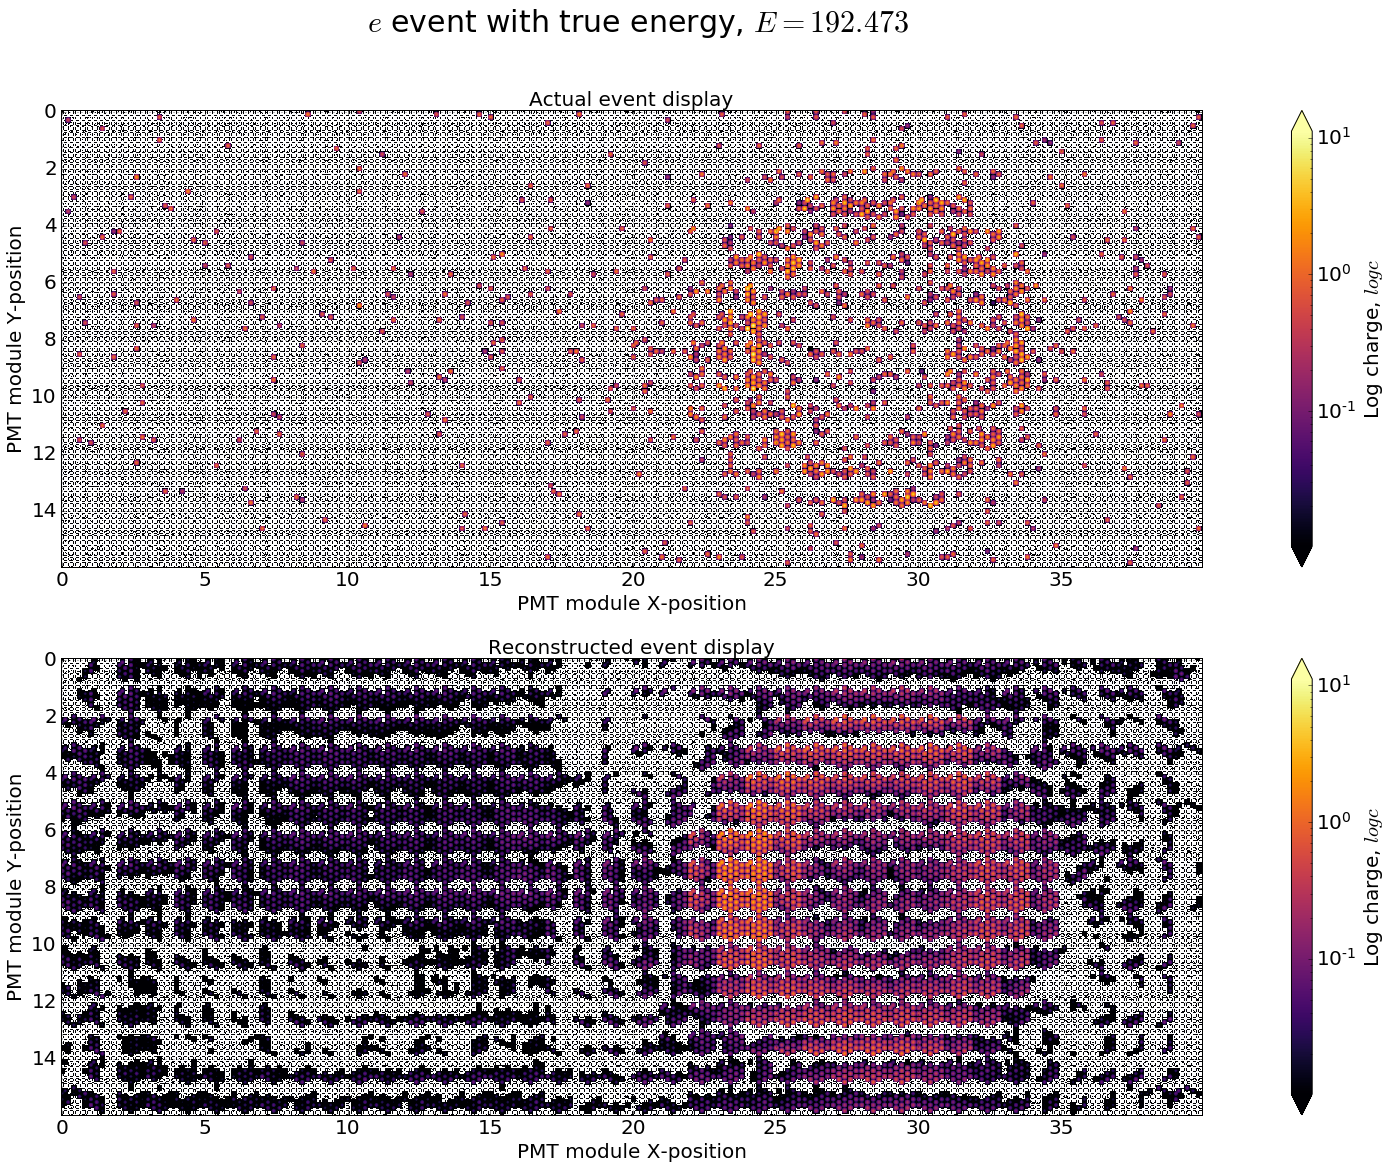

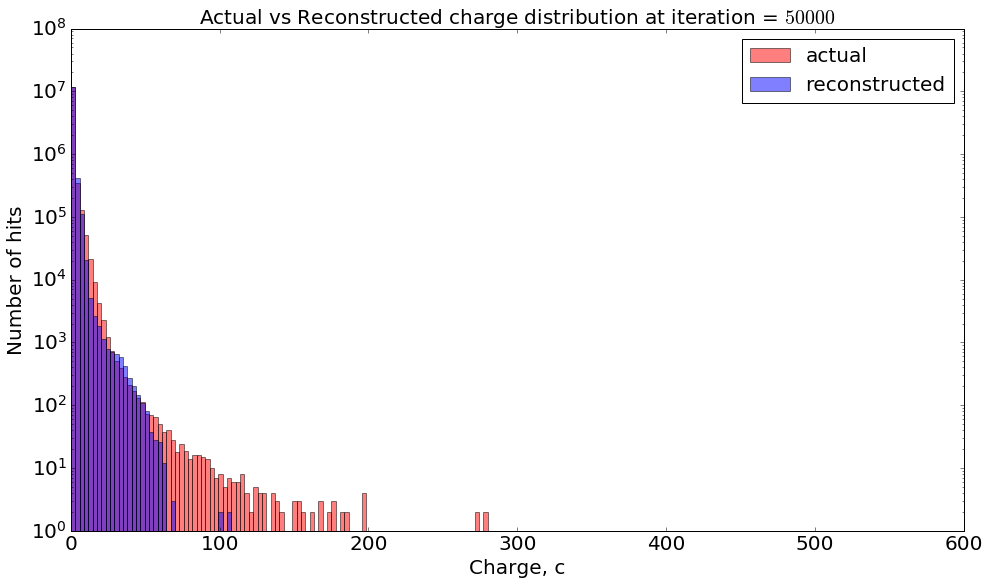

In [8]:
plot_training("20190710_035826", "ENet(VAE)", 21999, "VAE")

## Visualizing the evolution of the reconstructions

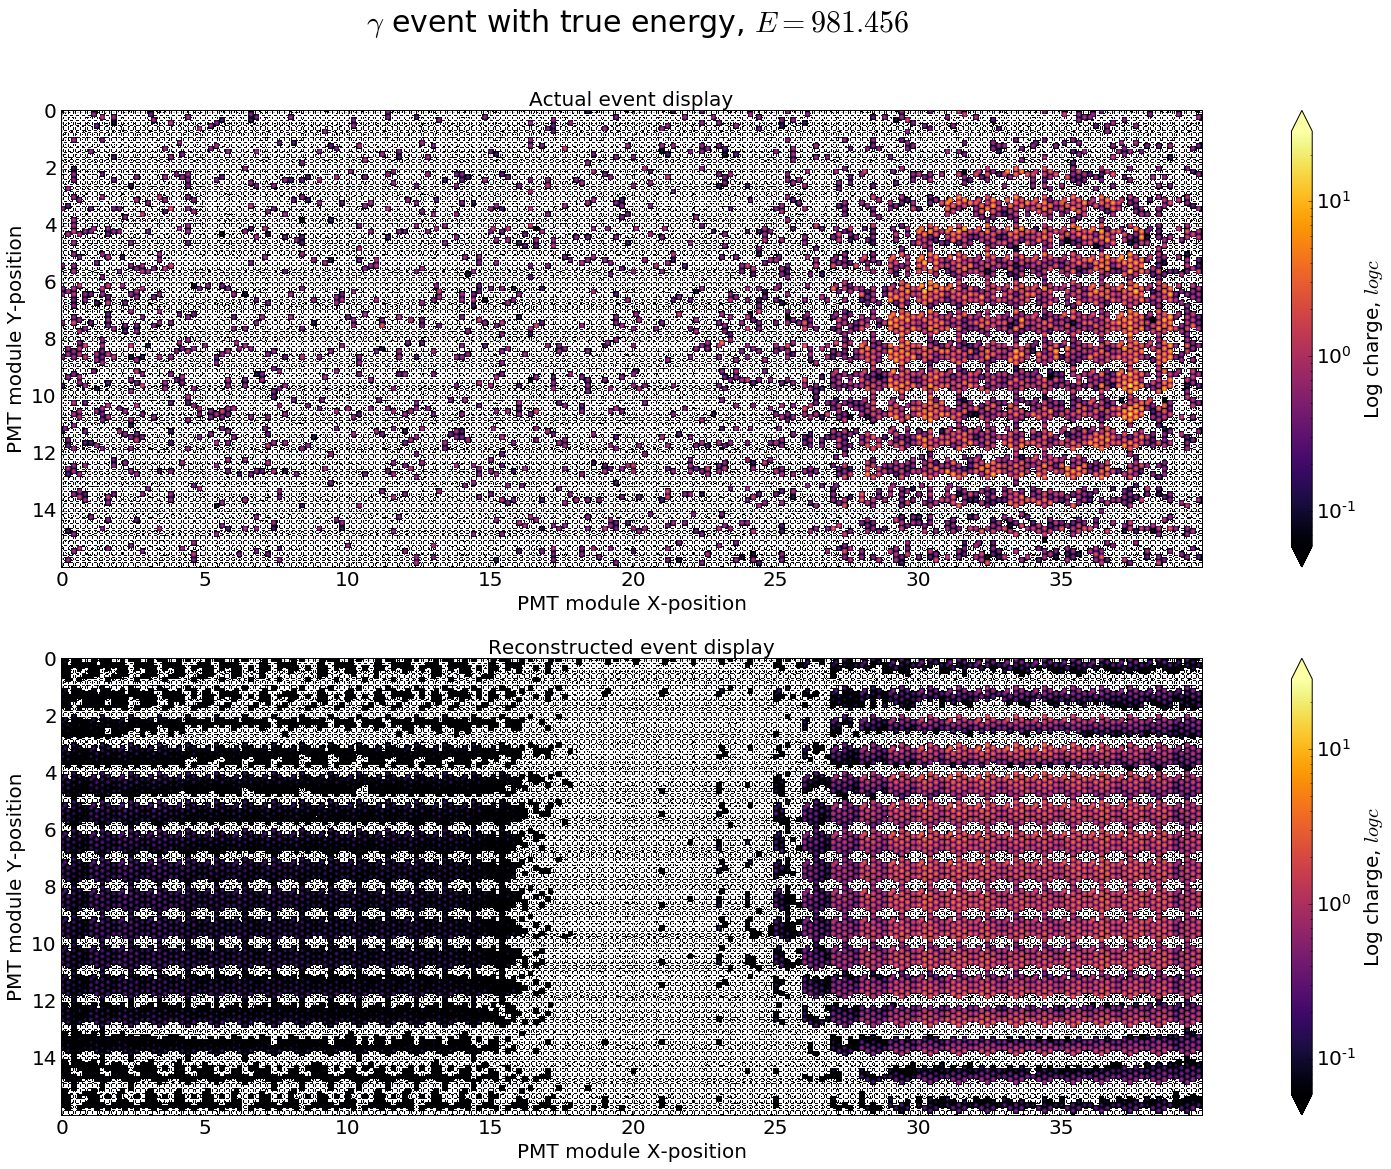

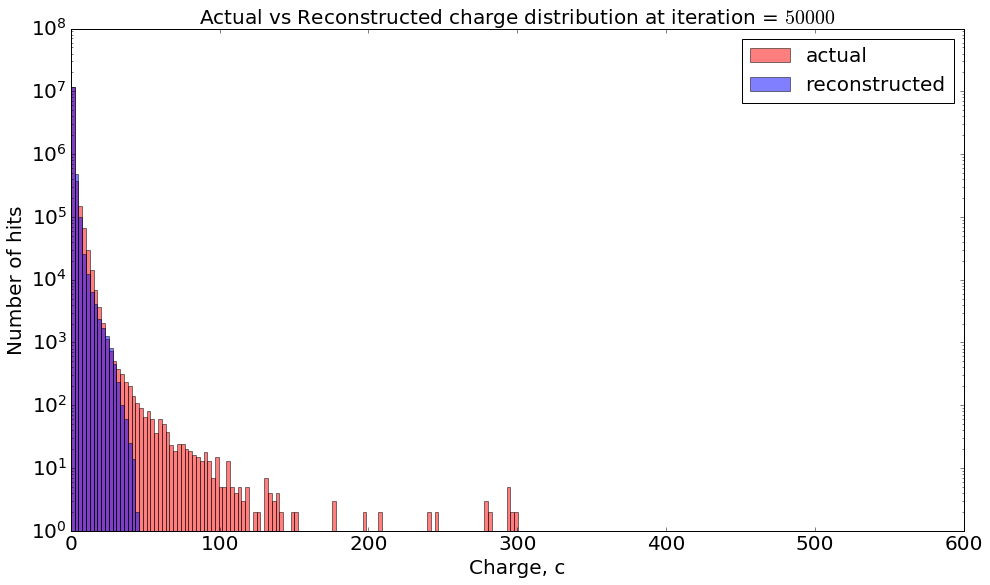

In [26]:
plot_event("/home/akajal/WatChMaL/VAE/dumps/20190710_035826/", 999, "Training")

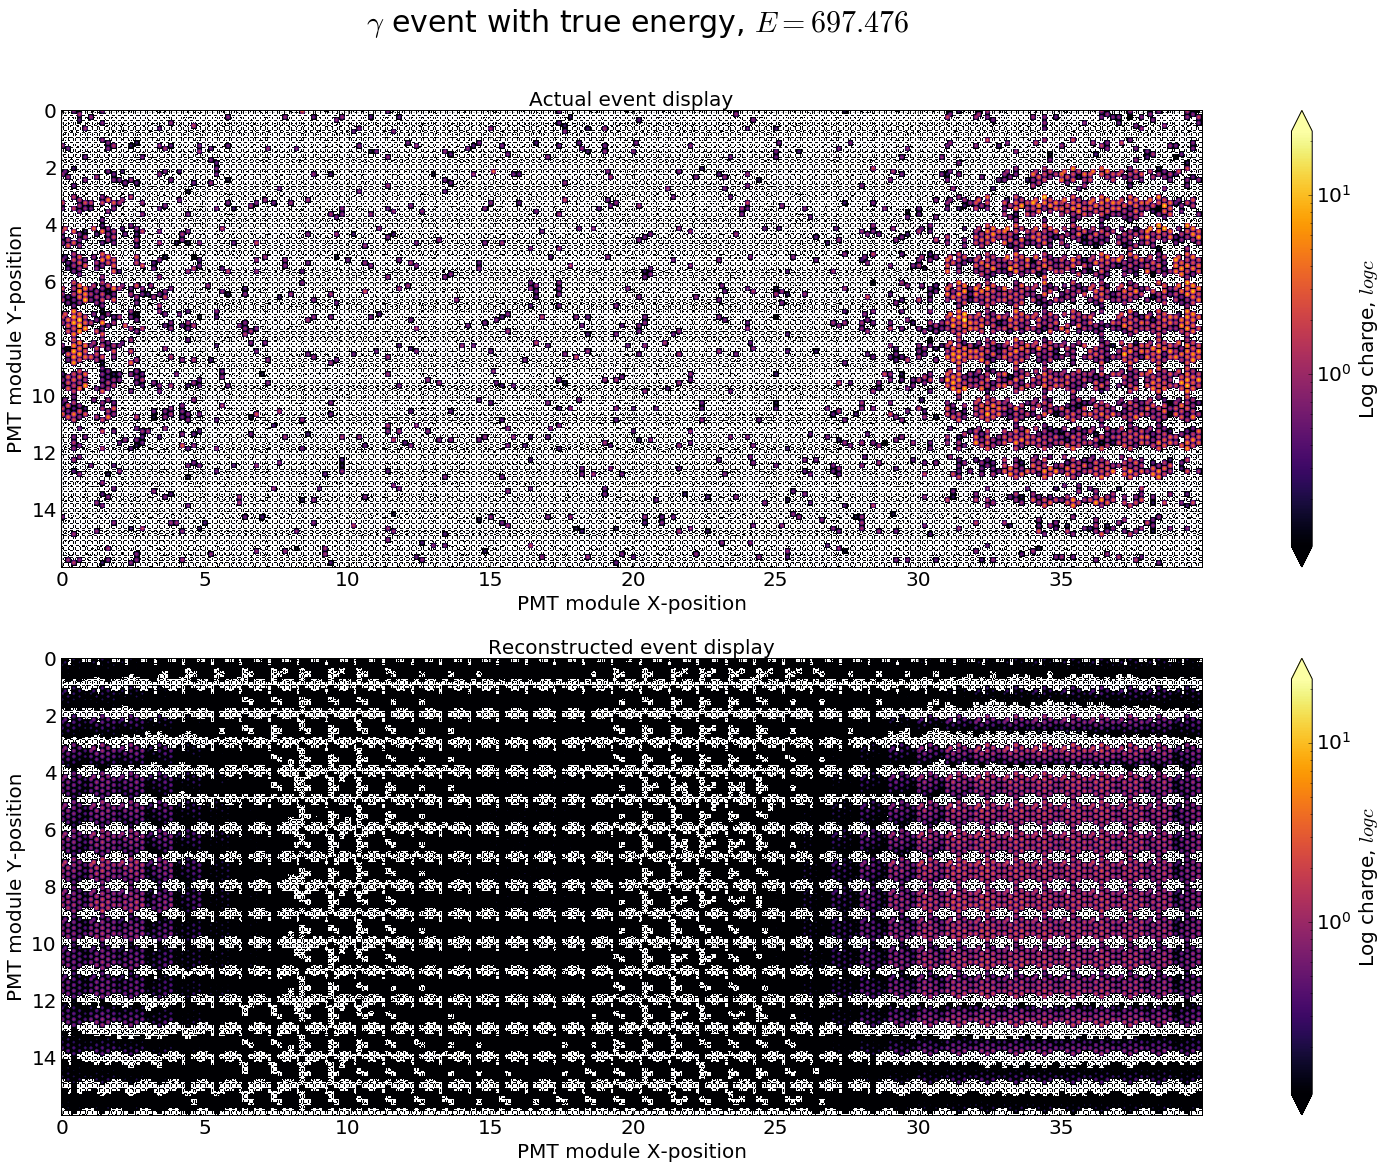

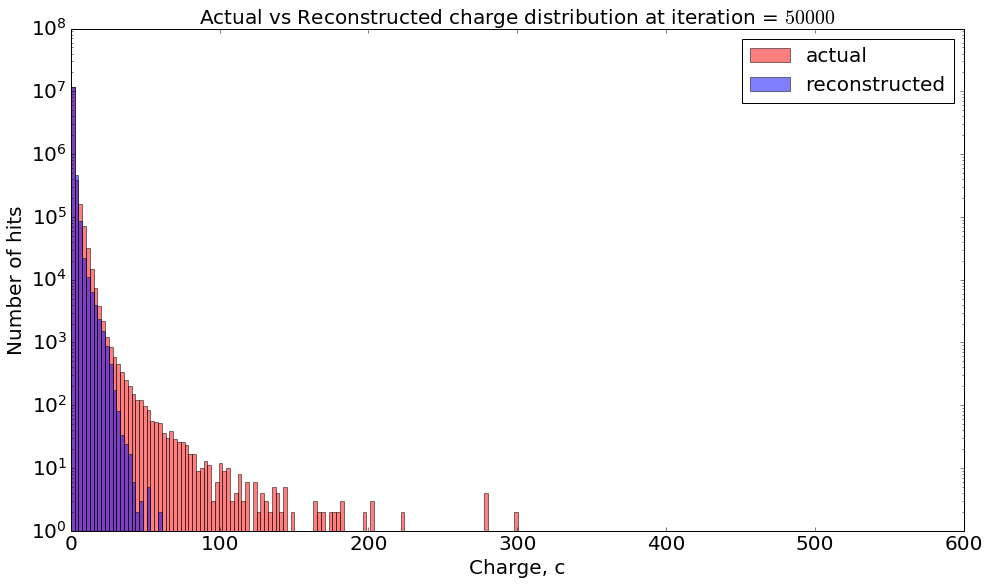

In [27]:
plot_event("/home/akajal/WatChMaL/VAE/dumps/20190710_035826/", 1999, "Training")

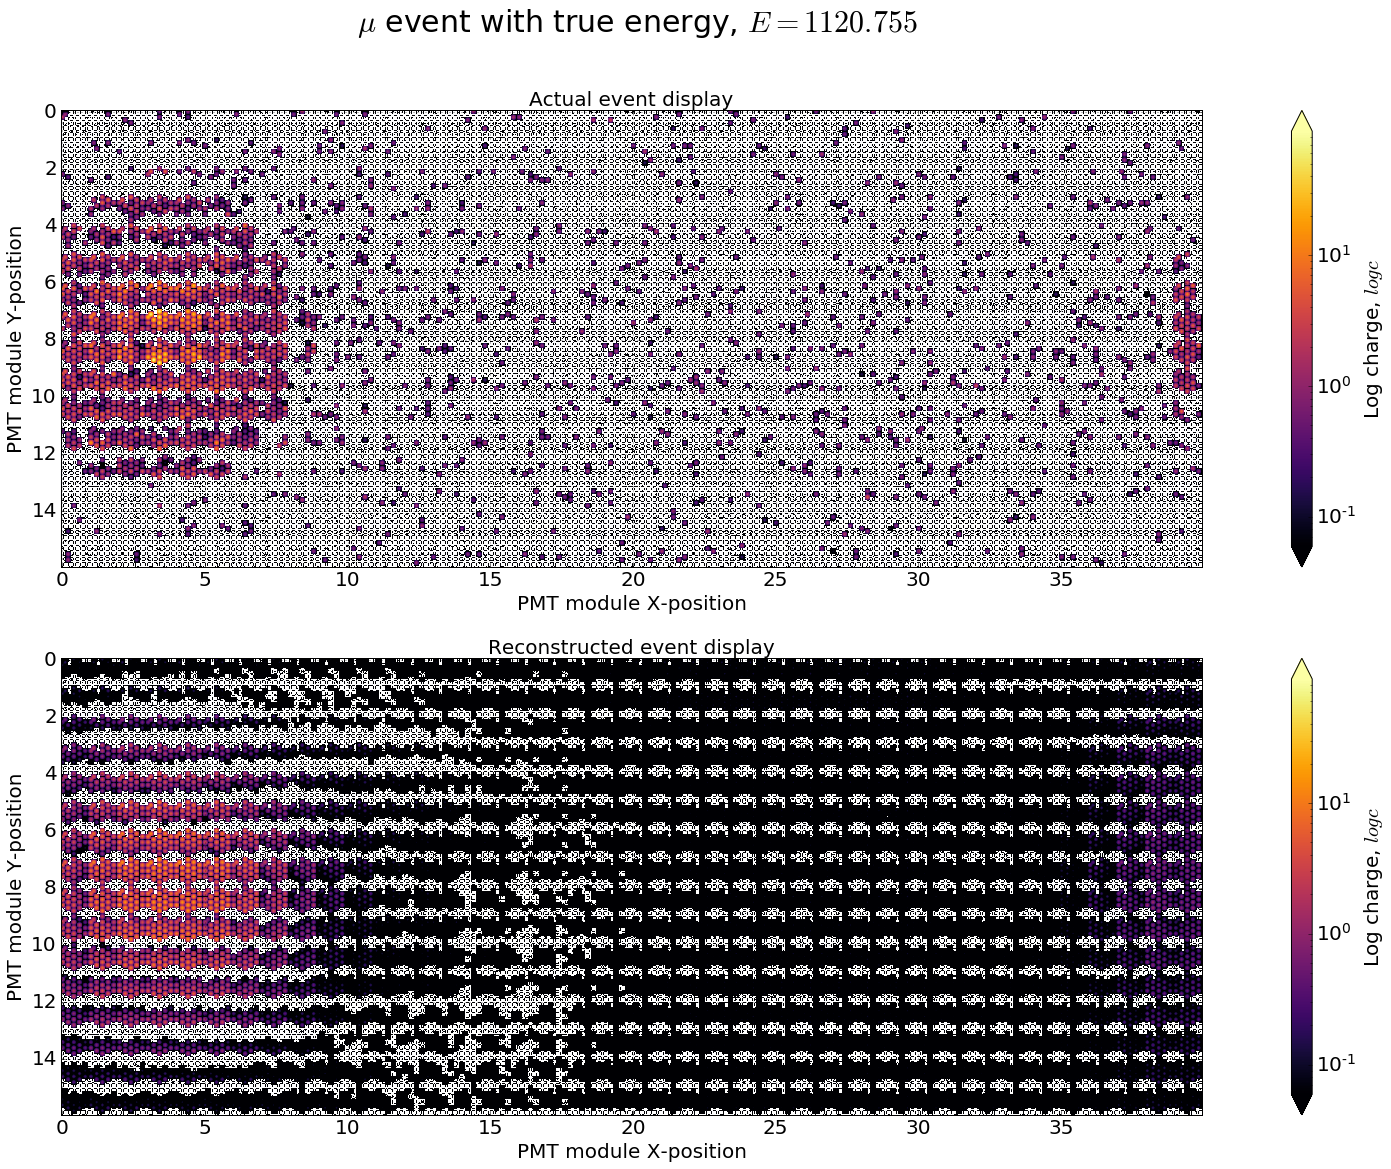

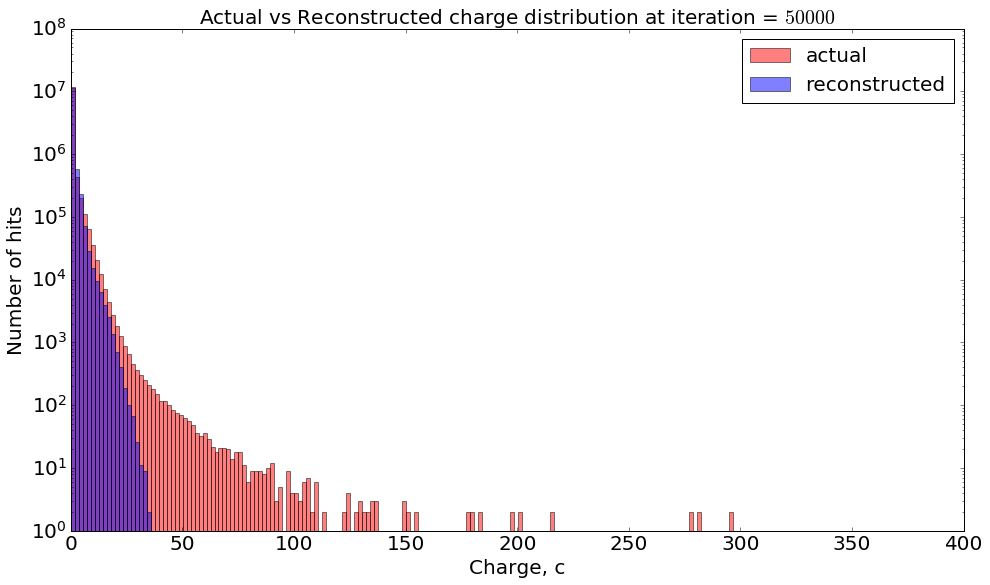

In [28]:
plot_event("/home/akajal/WatChMaL/VAE/dumps/20190710_035826/", 2999, "Training")

## Manually load and plot the samples

In [5]:
np_samples = np.load("/home/akajal/WatChMaL/VAE/dumps/20190710_043643/samples/ENet_0/100_samples.npy")

In [6]:
print(np_samples.shape)

(400, 16, 40, 19)


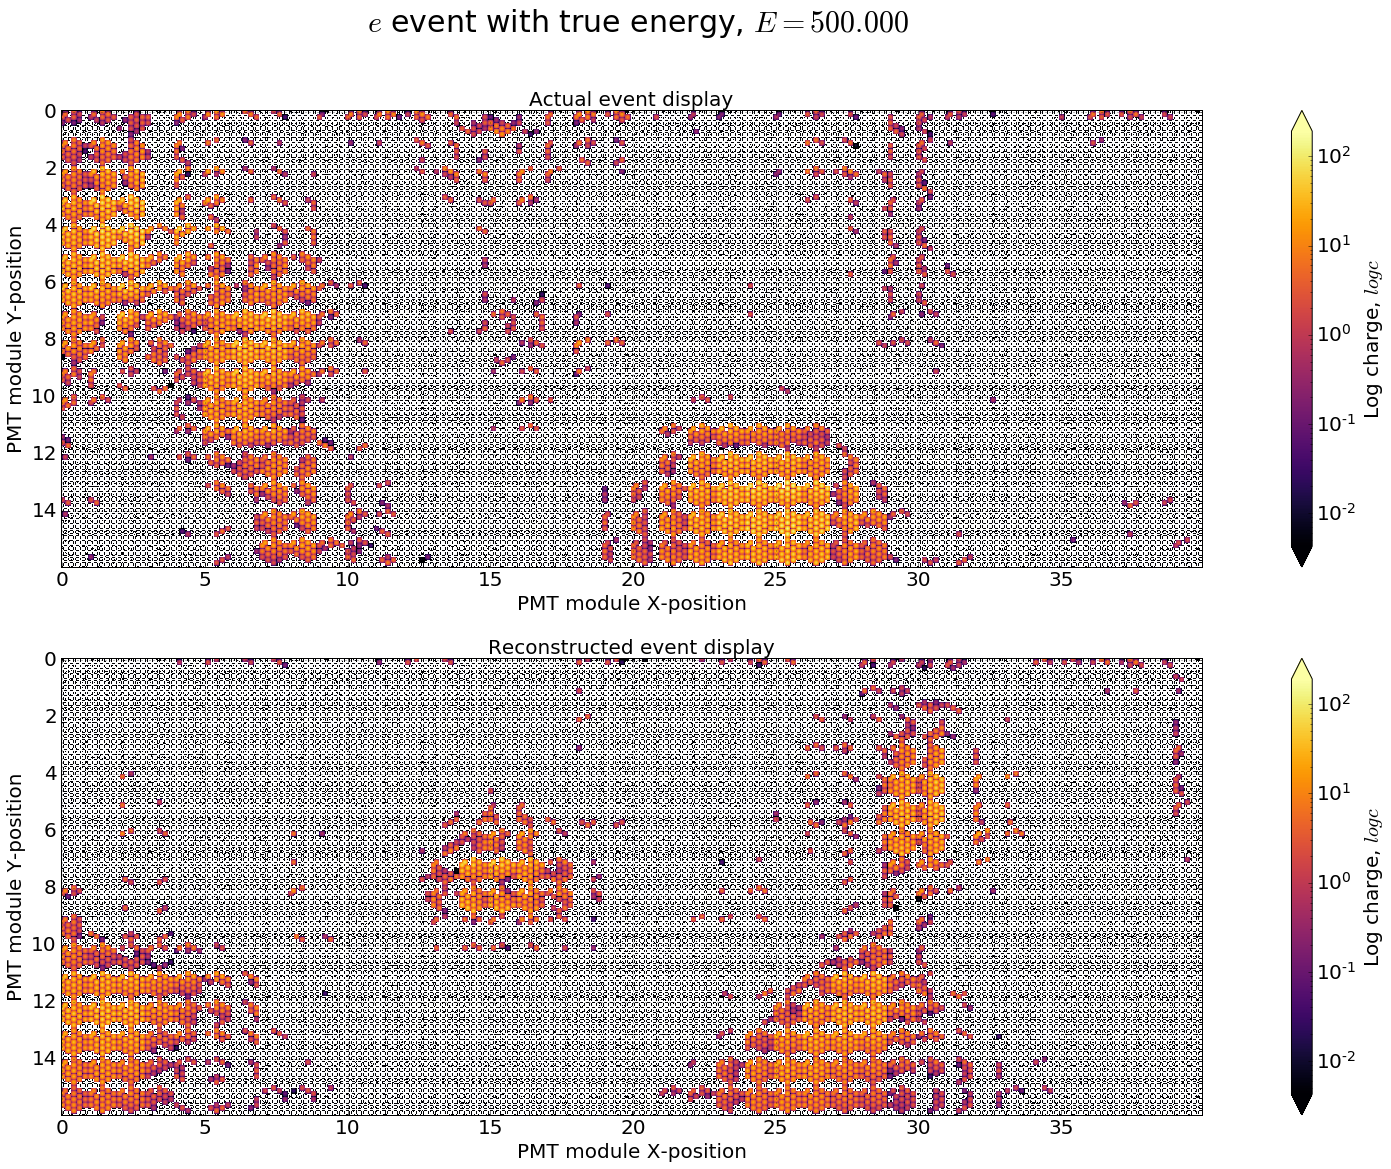

In [12]:
i = random.randint(0, np_samples.shape[0]-2)
plot_utils.plot_actual_vs_recon(np_samples[i], np_samples[i+1], 
                                    "e", 500,
                                    show_plot=True)